<a href="https://colab.research.google.com/github/iIsunnyIi/Biomedical_Signal_Processing/blob/main/Assignment_2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment-2**


1. Given an ECG signal “original_ECG.mat”, compute its DFT. (Sampling frequency
of the signal is 1000 Hz.)
* (a) Plot its magnitude and phase spectrum.
* (b) Find out the magnitude in dB and phase angle in degrees at frequency 30 Hz.
Display the values.


[39.60475775 40.07076881 40.5922544  ... 54.22427311 58.8477386
 62.91896577]


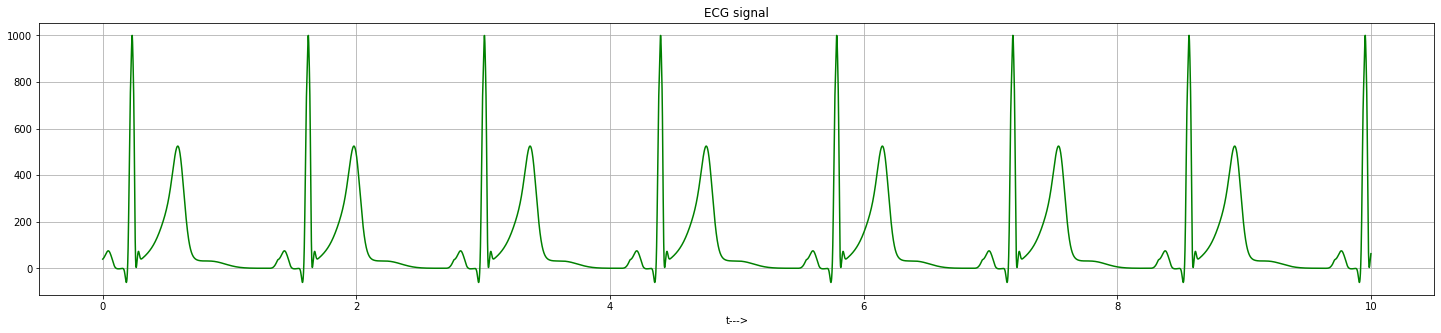

In [ ]:
#importing libraries
import numpy as np
import scipy.io as sio
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

#loading data
data = sio.loadmat('original_ECG.mat')
ecg=np.array(data['original'][0])

print(ecg)
f_s=1000
plt.figure(1,figsize=(25,5))
x=np.linspace(0,len(ecg)*0.001,len(ecg))
plt.plot(x,ecg, 'g')
plt.title("ECG signal")
plt.xlabel("t--->")
plt.grid(True)

In [ ]:
import matplotlib.pyplot as plt
from scipy.fft import fft
N=len(ecg)
print(N)
#N=np.shape(ecg)[1]

10000


[1051051.42082599   13141.35473388   16038.46044982 ...   21292.85031351
   16038.46044982   13141.35473388]


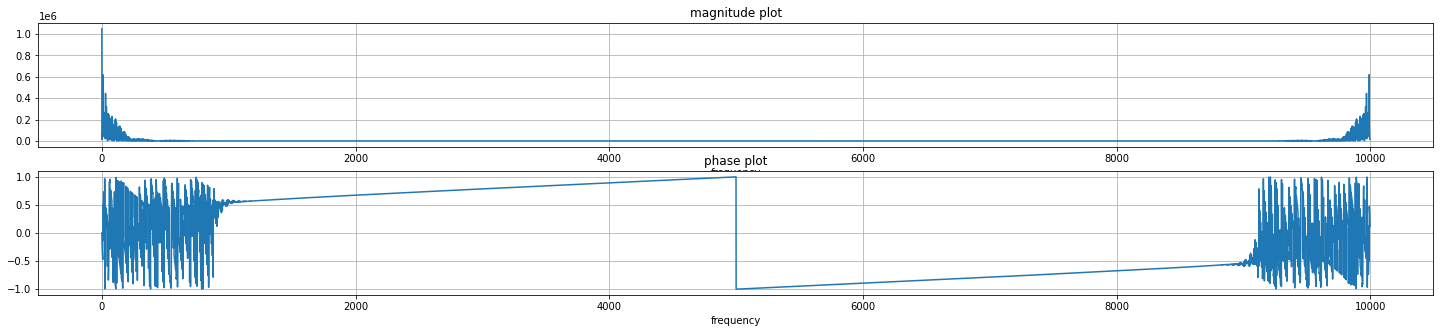

In [ ]:
#ref_num = 1000000  
n = np.arange(0,N) 
mag=np.abs(dft)
print(mag)
phase  = (np.angle(dft))/np.pi
spectrum=[mag ,phase]
title=["magnitude plot","phase plot"]
fig, axs = plt.subplots(2, 1, figsize=(25,5))
#x=np.linspace(0,len(n)*0.001,len(n))
for i in range(2):
    plt.subplot(2,1,i+1)
    plt.plot(n,spectrum[i])
    plt.title(str(title[i]))
    plt.xlabel('frequency')
    plt.grid()
    

In [ ]:
ref_num = 32768  #reference value used for dBFS scale. 32768 for int16 and 1 for float
print("The magnitude in dB at 30 Hz= ",np.round(20*np.log10(mag[30]),2),"dB")
print("The phase in adegree at 30 Hz= ", np.round(phase[30]*180/np.pi,2),"degree")

The magnitude in dB at 30 Hz=  98.57 dB
The phase in adegree at 30 Hz=  26.19 degree


2. The original speech signal is given as “science.wav”. The sampling rate is 32 Khz.
* (a) Add 10 dB, 0 dB and -10 dB Gaussian noise to it. Plot the signals
* (b) Perform Weiner filtering to eliminate the noise from the corrupted speech
signals. Evaluate the SNR value for the filtered speech signals.


In [1]:
!pip install wavio  #for reading and writing WAV files using numpy arrays
import numpy as np
import wavio
import scipy.io.wavfile as wavfile
import scipy.signal

In [4]:
aud=wavio.read('/content/science.wav').data
np.shape(aud)

(90267, 1)

Text(0, 0.5, 'Amplitude')

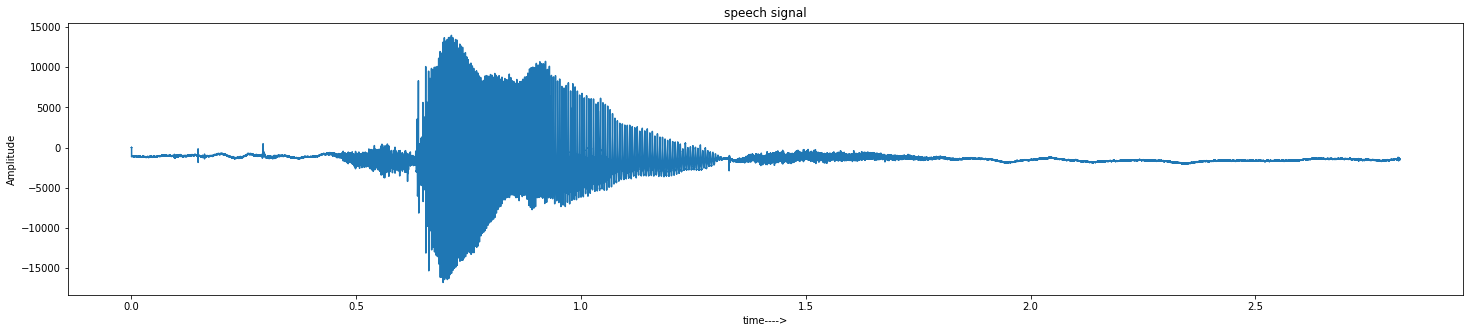

In [5]:
#Loading wav file
import matplotlib.pyplot as plt
sample_rate, speech_signal = wavfile.read("science.wav")
N=len(speech_signal)
T = 1.0/sample_rate
t = np.arange(0, N*T, T)

fig = plt.figure(1,figsize=(25,5))


plt.plot(t,speech_signal)
plt.title("speech signal")
plt.xlabel("time---->")
plt.ylabel("Amplitude")

In [7]:
import IPython.display as ipd

print('Utterance of the word : "science"')
ipd.Audio('/content/science.wav') # load a local WAV file

Utterance of the word : "science"


Text(0.5, 1.0, 'Noisy speech signal(10db noise)')

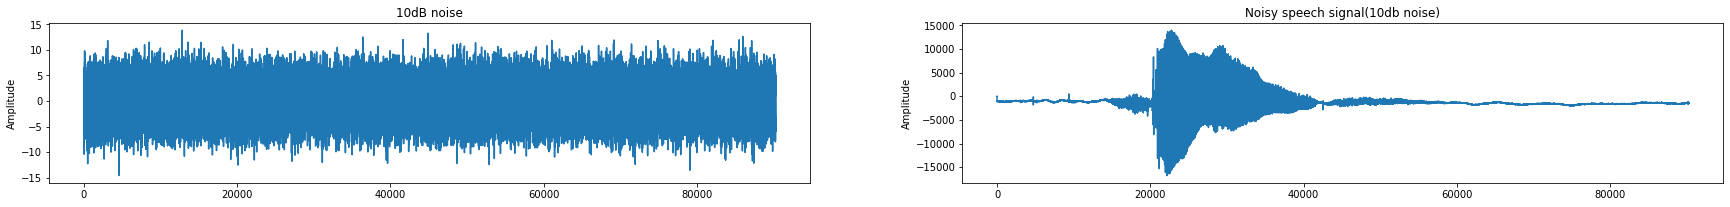

In [18]:
#Defining, Adding & plotting 10db Noise signal

noise_10db = np.random.normal(0,np.sqrt(10**(10/10)),len(speech_signal))    # 10 dB Gaussian noise
plt.figure(1,figsize=(30,10))
plt.subplot(3,2,1)
plt.plot(noise_10db)
plt.ylabel("Amplitude")
plt.title("10dB noise")

noisy_10 = speech_signal + noise_10db   #adding noise to signal
noisy_10db = noisy_10
plt.subplot(3,2,2)
plt.plot(noisy_10)
plt.ylabel("Amplitude")
plt.title("Noisy speech signal(10db noise)")

In [20]:
fs=32000
N=np.shape(aud)[0]
duration=N/fs
print('noisy sound')
wavio.write("/content/science_+10.wav", noisy_10db, fs, sampwidth=3)
ipd.Audio('/content/science_+10.wav') # load a local WAV file

noisy sound


Text(0.5, 1.0, 'Filtered signal with 10 db noise')

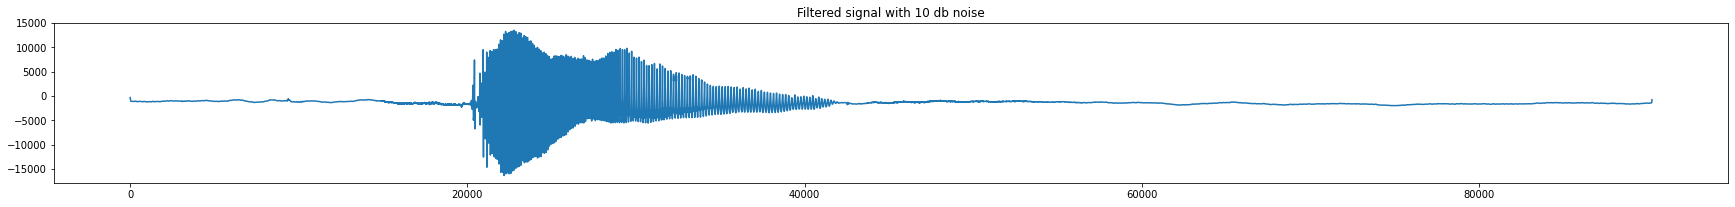

In [22]:
#Weiner filtering 

filtered_10db= scipy.signal.wiener(noisy_10,mysize = 40)
plt.figure(1,figsize=(30,10))
plt.subplot(3,1,1)
plt.plot(filtered_10db)
plt.title("Filtered signal with 10 db noise")

In [30]:
wavio.write("/content/science_+10_filtered.wav", filtered_10db, fs, sampwidth=3)
ipd.Audio('/content/science_+10_filtered.wav') # load a local WAV file

In [25]:
#SNR for filtered 10db signal
print("SNR Value for filtered 10 db signal is :",np.round(10*np.log10(np.sum(np.abs(filtered_10db)**2)/np.sum(np.abs(noise_10db)**2)),2))

SNR Value for filtered 10 db signal is : 56.57


Text(0.5, 1.0, 'Noisy speech signal(0dB noise)')

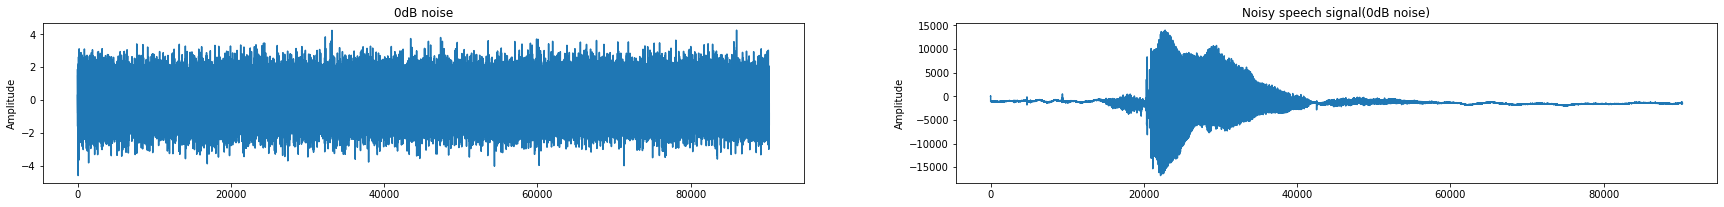

In [28]:
#Adding & plotting 0db Noise signal
noise_0db = np.random.normal(0,np.sqrt(10**(0/10)),len(speech_signal))      # 0 dB Gaussian Noise
plt.figure(1,figsize=(30,10))
plt.subplot(3,2,3)
plt.plot(noise_0db)
plt.ylabel("Amplitude")
plt.title("0dB noise")
noisy_0 = speech_signal + noise_0db #adding noise to speech signal
noisy_0db = noisy_0
plt.subplot(3,2,4)
plt.plot(noisy_0)
plt.ylabel("Amplitude")
plt.title("Noisy speech signal(0dB noise)")

In [33]:
fs=32000
N=np.shape(aud)[0]
duration=N/fs
print('noisy sound')
wavio.write("/content/science_0.wav", noisy_0, fs, sampwidth=3)
ipd.Audio('/content/science_0.wav') # load a local WAV file

noisy sound


Text(0.5, 1.0, 'Filtered signal with 0 db noise')

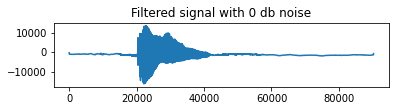

In [34]:
#Weiner filtering 
filtered_0db= scipy.signal.wiener(noisy_0,mysize = 40)
plt.subplot(3,1,2)
plt.plot(filtered_0db)
plt.title("Filtered signal with 0 db noise")

In [36]:
wavio.write("/content/science_0_filtered.wav", filtered_0db, fs, sampwidth=3)
ipd.Audio('/content/science_0_filtered.wav') # load a local WAV file

In [37]:
#SNR for filtered 0db signal
print("SNR Value for filtered 0 db signal is :",np.round(10*np.log10(np.sum(np.abs(filtered_0db)**2)/np.sum(np.abs(noise_0db)**2)),2))

SNR Value for filtered 0 db signal is : 66.55


Text(0.5, 1.0, 'Noisy speech signal(-10dB noise)')

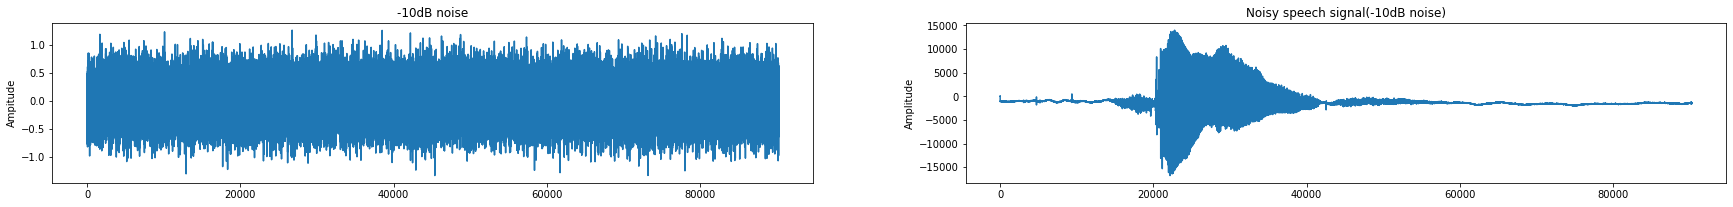

In [38]:
#Adding & plotting -10db Noise signal
noise_neg10db = np.random.normal(0,np.sqrt(10**(-10/10)),len(speech_signal))  # -10 dB Gaussian noise
plt.figure(1,figsize=(30,10))
plt.subplot(3,2,5)
plt.plot(noise_neg10db)
plt.ylabel("Ampitude")
plt.title("-10dB noise")


noisy_neg10 = speech_signal + noise_neg10db # adding noise to speech signal
plt.subplot(3,2,6)
plt.plot(noisy_neg10)
plt.ylabel("Amplitude")
plt.title("Noisy speech signal(-10dB noise)")

In [39]:
fs=32000
N=np.shape(aud)[0]
duration=N/fs
print('noisy sound')
wavio.write("/content/science_-10.wav", noisy_neg10, fs, sampwidth=3)
ipd.Audio('/content/science_-10.wav') # load a local WAV file

noisy sound


Text(0.5, 1.0, 'Filtered signal with -10 db noise')

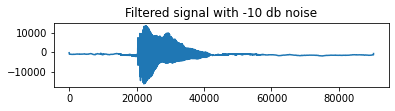

In [44]:
#Weiner filtering 
filtered_neg10db= scipy.signal.wiener(noisy_0,mysize = 40)
plt.subplot(3,1,2)
plt.plot(filtered_neg10db)
plt.title("Filtered signal with -10 db noise")

In [42]:
wavio.write("/content/science_-10_filtered.wav", filtered_0db, fs, sampwidth=3)
ipd.Audio('/content/science_-10_filtered.wav') # load a local WAV file

In [43]:
#SNR for filtered 10db signal
print("SNR Value for filtered -10 db signal is :",np.round(10*np.log10(np.sum(np.abs(filtered_neg10db)**2)/np.sum(np.abs(noise_neg10db)**2)),2))

SNR Value for filtered -10 db signal is : 76.57
